<a href="https://colab.research.google.com/github/tassandro/Alb-m-de-Figurinhas/blob/main/Resolu%C3%A7%C3%A3o_da_Lista_de_Exerc%C3%ADcos_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Equipe: nomes completo

# Zeros de Funções Não-Lineares

## Problema 1

Água está escoando em um canal trapezoidal a uma vazão de
$Q = 20 m^3/s$. A profundidade crítica y para tal canal deve satisfazer
a equação
$$ 0 = 1 - \dfrac{Q^2}{gA_c^3}B$$
onde $g = 9,81 m/s^2$, $A_c$ é a área da seção transversal $(m^2)$, e $B$ é a
largura do canal na superfície (m). Para esse caso, a largura e a área
transversal podem ser relacionadas à profundidade y por
$$B = 3 + y\;\;\;\;\
e\;\;\;\;\;\
A_c = 3y + \frac{y^2}{2}$$


Encontre a profundidade crítica usando

(a) o método gráfico,

(b) a bissecção e

(c) a falsa posição.

Para (b) e (c), use aproximações ini-
ciais de $x_l = 0,5$ e $x_u = 2,5$, e itere até que o erro aproximado
fique abaixo de 1% ou que o número de iterações ultrapasse 10.
Discuta seus resultados.


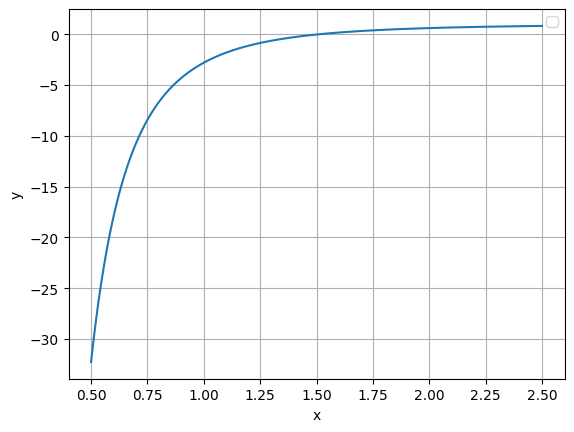

Resultado x: 1.5078125
Erro: 0.0051813471502590676
História de x: [1.5, 2.0, 1.75, 1.625, 1.5625, 1.53125, 1.515625, 1.5078125, 0, 0]
Resultado x: 2.0907660676945174
Erro: 0.015913583072297365
História de x: [2.450831476880765, 2.4036291706036788, 2.358341918973515, 2.314919172687897, 2.2733109174519908, 2.233467604885876, 2.1953400929148894, 2.158879596220967, 2.1240376471975146, 2.0907660676945174]


In [ ]:
#solução
#método 1
import numpy as np
import matplotlib.pyplot as plt

def g(x):
    return 1 - ((20**2)*(3+x))/(9.81*((3*x+(x**2)/2))**3)


def plot_graphs():
    x = np.linspace(0.5, 2.5, 10000)  # Intervalo de x de 0.01 a 3 com 1000 pontos
    y_g = g(x)

    plt.plot(x, y_g)

    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_graphs()

#método 2
def bisc(f, a, b, TolX=1e-2, MaxIter=10):
    xx = [0] * MaxIter
    TolFun = np.finfo(float).eps
    fa = f(a)
    fb = f(b)

    if fa * fb > 0:
        raise ValueError("Devemos ter f(a)f(b) < 0!")

    for k in range(MaxIter):
        xx[k] = (a + b) / 2
        fx = f(xx[k])
        err =np.abs((xx[k]-xx[k-1])/(xx[k]))

        if abs(fx) < TolFun or abs(err) < TolX:
            break
        elif fx * fa > 0:
            a = xx[k]
            fa = fx
        else:
            b = xx[k]

    x = xx[k]

    if k == MaxIter:
        print(f"O melhor resultado em {MaxIter} iterações")

    return x, err, xx

def f(x):
    return 1 - ((20**2)*(3+x))/(9.81*((3*x+(x**2)/2))**3)

a = 0.5
b = 2.5
TolX = 1e-2
MaxIter = 10

x, err, xx = bisc(f, a, b, TolX, MaxIter)
print("Resultado x:", x)
print("Erro:", err)
print("História de x:", xx)


#método 3

def falsp(f, a, b, TolX=1e-2, MaxIter=10):
    xx = [0] * MaxIter
    TolFun = np.finfo(float).eps
    fa = f(a)
    fb = f(b)

    if fa * fb > 0:
        raise ValueError("Devemos ter f(a)f(b) < 0!")

    for k in range(MaxIter):
        xx[k] = (a * fb - b * fa) / (fb - fa)
        fx = f(xx[k])
        err =np.abs((xx[k]-xx[k-1])/(xx[k]))

        if abs(fx) < TolFun or err < TolX:
            break
        elif fx * fa > 0:
            a = xx[k]
            fa = fx
        else:
            b = xx[k]
            fb = fx

    x = xx[k]

    if k == MaxIter:
        print(f"O melhor resultado em {MaxIter} iterações")

    return x, err, xx

def f(x):
     return 1 - ((20**2)*(3+x))/(9.81*((3*x+(x**2)/2))**3)

a = 0.5
b = 2.5
TolX = 1e-2
MaxIter = 10

x, err, xx = falsp(f, a, b, TolX, MaxIter)
print("Resultado x:", x)
print("Erro:", err)
print("História de x:", xx)

## Problema 2

 Determine a maior raiz real de

$$f (x) = 2x^3 − 11,7x^2 + 17,7x − 5$$

(a) Graficamente.

(b) Pelo método da iteração de ponto fixo (três iterações, $x_0 = 3$).
Observação: certifique-se de desenvolver uma solução que
convirja para a raiz.

(c) Pelo método de Newton-Raphson (três iterações, $x_0 = 3$).

(d) Pelo método da secante (três iterações, $x_1 = 3$, $x_0 = 4$).

Calcule os erros relativos percentuais aproximados para suas
soluções.

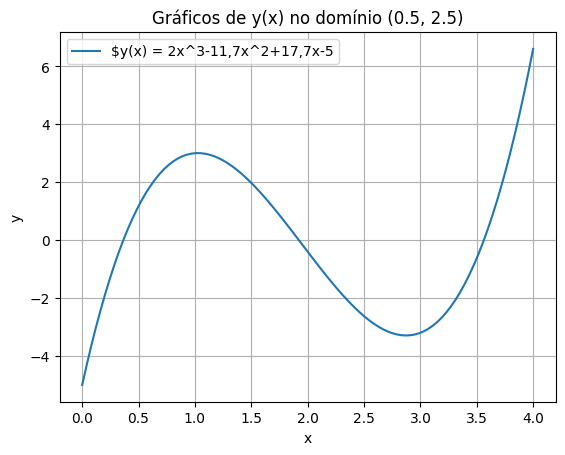

Não confie em mim, embora o melhor resultado seja em 3 iterações
Resultado x: 3.442543246990202
Último erro: 0.03256910871746495
Histórico de x: [3, 3.1807909604519775, 3.3339591683757823, 3.442543246990202]
Resultado x: 3.7929344806432264
Resultado f(x): 2.947603115432983
Erro de x: 0.16823050846754864
Raiz aproximada: 3.4812727094176554
Erro relativo: 0.046517562953773746


In [ ]:
#solução
#método 1
import numpy as np
import matplotlib.pyplot as plt

def g(x):
    return 2*x**3-11.7*x**2+17.7*x-5

def plot_graphs():
    x = np.linspace(0, 4, 100)  # Intervalo de x de 0.01 a 3 com 1000 pontos
    y_g = g(x)

    plt.plot(x, y_g, label='$y(x) = 2x^3-11,7x^2+17,7x-5')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.title('Gráficos de y(x) no domínio (0.5, 2.5)')
    plt.show()

plot_graphs()

#método 2
def fixpt(g, x0, TolX=1e-6, MaxIter=3):
    """
    Resolve x = g(x) começando de x0 por iteração de ponto fixo.

    :param g: Função g(x).
    :param x0: Palpite inicial.
    :param TolX: Limite superior da diferença incremental |x(n + 1) - x(n)|.
    :param MaxIter: Número máximo de iterações.
    :return: x = ponto alcançado pelo algoritmo,
             err = último valor |x(k) - x(k - 1)| alcançado,
             xx = histórico de x.
    """

    xx = [x0]
    for k in range(1, MaxIter + 1):
        xx.append(g(xx[k - 1]))
        err = abs((xx[k] - xx[k - 1])/(xx[k-1]))
        if err < TolX:
            break

    x = xx[-1]

    if k == MaxIter:
        print(f"Não confie em mim, embora o melhor resultado seja em {MaxIter} iterações")

    return x, err, xx

# Exemplo de uso:
def g(x):
    return (5-2*x**3+11.7*x**2)/17.7

x0 = 3
TolX = 1e-6
MaxIter = 3

x, err, xx = fixpt(g, x0, TolX, MaxIter)
print(f"Resultado x: {x}")
print(f"Último erro: {err}")
print(f"Histórico de x: {xx}")

#método 3
import numpy as np

def newton(f, df, x0, TolX, MaxIter):
    h = 1e-4
    h2 = 2 * h
    TolFun = np.finfo(float).eps
    xx = [x0]
    fx = f(x0)

    for k in range(MaxIter):
        if not isinstance(df, (int, float)):
            dfdx = df(xx[k])
        else:
            dfdx = (f(xx[k] + h) - f(xx[k] - h)) / h2

        dx = -fx / dfdx
        xx.append(xx[k] + dx)
        fx = f(xx[k + 1])
        err = abs((xx[k] - xx[k - 1])/(xx[k-1]))

        if abs(fx) < TolFun or abs(dx) < TolX:
            break

    x = xx[-1]

    if k == MaxIter:
        print(f"The best in {MaxIter} iterations")

    return x, fx, err

# Exemplo de uso:
def f(x):
    return 2*x**3-11.7*x**2+17.7*x-5

def df(x):
    return 6*x**2-23.4*x+17.7

x0 = 3
TolX = 1e-6
MaxIter = 3

x, fx, err = newton(f, df, x0, TolX, MaxIter)

print("Resultado x:", x)
print("Resultado f(x):", fx)
print("Erro de x:", err)

#método 4
def secant_method(f, x0, x1, TolX=1e-6, MaxIter=100):
    xx = [0] * (MaxIter + 1)
    xx[0] = x0
    xx[1] = x1
    TolFun = 1e-12  # Reduzindo a tolerância para evitar problemas numéricos
    dx = 0

    for k in range(1, MaxIter):
        dfdx = (f(xx[k]) - f(xx[k - 1])) / (xx[k] - xx[k - 1])
        dx = -f(xx[k]) / dfdx
        xx[k + 1] = xx[k] + dx

        if abs(f(xx[k + 1])) < TolFun or abs(dx) < TolX:
            break

    raiz_aproximada = xx[k + 1]


    # Cálculo do erro relativo
    if abs(xx[k]) < 1e-12:
        err = abs((raiz_aproximada - xx[k - 1]) / xx[k - 1])
    else:
        err = abs((raiz_aproximada - xx[k]) / xx[k])

    return raiz_aproximada, err

# Exemplo de uso:
x0 = 3
x1 = 4
MaxIter = 3
def f(x):
 return 2*x**3-11.7*x**2+17.7*x-5
raiz_aproximada, erro = secant_method(f, x0, x1, MaxIter=MaxIter)
print("Raiz aproximada:", raiz_aproximada)
print("Erro relativo:", erro)


## Problema 3

Você está projetando um tanque esférico para
armazenar água para uma pequena vila na Amazônia. O volume de líquido que ele pode armazenar pode ser calculado por
$$V =\pi h^2\dfrac{
[3R − h]}{3}$$
onde V é o volume [$m^3$ ], h é a profundidade da água no tanque [m]
e R é o raio do tanque [m].

Se R = 3 m, até qual profundidade o tanque deve ser enchido para
que armazene 30 $m^3$ ? Use três iterações do método de Newton-
Raphson para determinar sua resposta. Determine o erro relativo
aproximado depois de cada iteração. Observe que uma aproxi-
mação inicial R será sempre convergente.

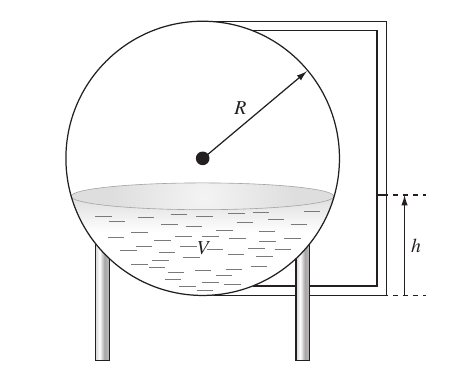

In [ ]:
from math import pi

import numpy as np

def newton(f, df, x0, TolX, MaxIter):
    h = 1e-4
    h2 = 2 * h
    TolFun = np.finfo(float).eps
    xx = [x0]
    fx = f(x0)
    err = []

    for k in range(MaxIter):
        if not isinstance(df, (int, float)):
            dfdx = df(xx[k])
        else:
            dfdx = (f(xx[k] + h) - f(xx[k] - h)) / h2

        dx = -fx / dfdx
        xx.append(xx[k] + dx)
        fx = f(xx[k + 1])

        relative_error = abs(dx) / (abs(xx[k + 1]) + 1e-8)  # Avoid division by zero
        err.append(relative_error)

        if abs(fx) < TolFun or abs(dx) < TolX:
            break

    x = xx[-1]

    if k == MaxIter:
        print(f"The best in {MaxIter} iterations")

    return x, fx, err

# Exemplo de uso:
def f(x):
    return pi*x**2*(9-x)/90 - 1

def df(x):
    return pi*x/5 - pi*x**2/30

x0 = 2.5
TolX = 1e-6
MaxIter = 3

x, fx, err = newton(f, df, x0, TolX, MaxIter)

print("Resultado x:", x)
print("Resultado f(x):", fx)
print("Erros relativos por iteração:", err)


Resultado x: 2.026905728446993
Resultado f(x): 1.1551759548922291e-10
Erros relativos por iteração: [0.2232540783842166, 0.008283294283340068, 1.661129284842106e-05]



## Problema 4

Os sistemas mecânicos reais podem envolver a deflexão de molas não-lineares. Na Figura, uma massa m é abandonada a uma distância h acima de uma mola não-linear. A força de resistência F da mola é dada por

$$F = − (k_1d + k_2d^{3/2})$$


A conservação da energia pode ser usada para mostrar que

$$0 = \dfrac{2k_2d^{5/2}}{5} +\dfrac{1}{2}k_1d^2
-mgd -mgh$$

Determine $d$ dados os seguintes valores dos parâmetros:
$k1 = 50.000\;g/s^2$, $k_2 = 40 \;g/(s^2 m^{0,5} )$, $m = 90 g$, $g = 9,81\; m/s^2$ e
$h = 0,45 \;m$.


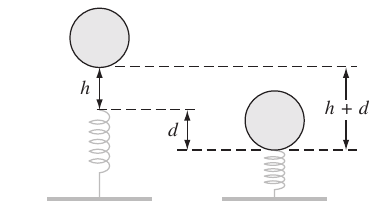

In [ ]:
k1 = 50
k2 = 0.04
m = 0.09
g = 9.81
h = 0.45



from sympy import symbols, diff, lambdify
x = symbols('x')
def NewRaph(f, x0, ϵ=1e-8, Nmax=100):
    xn = x0
    df = diff(f,x)
    for n in range(Nmax):
        fxn = lambdify(x, f, 'math')(xn)
        if abs(fxn) < ϵ:
            print('Solução encontrada após',n,'iterações')
            return xn
        dfxn = lambdify(x, df, 'math')(xn)
        if dfxn == 0:
            print('Zero derivative. No solution found.')
            return None
        xn = xn - fxn/dfxn
    print('Exceeded maximum iterations. No solution found.')
    return None
f = 2*k2*x**(5/2)/5+k1*x**2/2-m*g*x-m*g*h
NewRaph(f, x0=0.20)



Solução encontrada após 4 iterações


0.1449328482703562

## Problema 5

 Uma carga total $Q$ está uniformemente distribuída ao redor de um condutor circular de raio $a$. Uma carga $q$ está localizada a uma distância $x$ do centro do anel (Figura P8.31). A força exercida na
carga pelo anel é dada por

$$
F = \dfrac{1}{4 \pi \epsilon_0}\dfrac{qQx}{(x^2 +a^2)^{3/2}}
$$

onde $\epsilon_0 = 8,85 × 10^{−12} \;\;C^2 /(N m^2)$. Encontre a distância $x$ onde a
força é $1,25\;\; N$ se $q$ e $Q$ são $2 × 10^{−5} \;\;C$ para um anel de raio $0,9\;\; m$.


In [55]:
q = 2*1e-5
Q = 2*1e-5
from math import pi
e0 = 8.85*1e-12

from sympy import symbols, diff, lambdify
x = symbols('x')
def NewRaph(f, x0, ϵ=1e-8, Nmax=100):
    xn = x0
    df = diff(f,x)
    for n in range(Nmax):
        fxn = lambdify(x, f, 'math')(xn)
        if abs(fxn) < ϵ:
            return xn
        dfxn = lambdify(x, df, 'math')(xn)
        if dfxn == 0:
            print('Zero derivative. No solution found.')
            return None
        xn = xn - fxn/dfxn
    print('Exceeded maximum iterations. No solution found.')
    return None
f = Q*q*x/(4*pi*e0*(x**2+(0.9)**2)**(3/2))-1.25

sol1 = NewRaph(f, x0=0.5)
sol2 = NewRaph(f, x0=1.5)

if sol1 is not None:
    print("Solução 1:", sol1)

if sol2 is not None:
    print("Solução 2:", sol2)


Solução 1: 0.29537212088494014
Solução 2: 1.229572963452634


## Problema 6


Para o escoamento de fluidos em tubos, o atrito é descrito por um número adimensional, o fator de atrito de Fanning $f$. O fator de
atrito de Fanning depende de diversos parâmetros relacionados ao tamanho do tubo e ao fluido, os quais podem todos ser representados por uma outra quantidade adimensional, o número de Reynolds
$Re$. Uma fórmula que prevê $f$ dado $Re$ é a equação de von Karman,

$$
\dfrac{1}{\sqrt{f}}= 4 \log_{10}(Re\sqrt{f}) -0,4
$$

Para o escoamento turbulento, os valores típicos do número de Reynolds estão entre 10.000 e 500.000 e os do fator de atrito de Fanning estão entre 0,001 e 0,01. Desenvolva uma função que use a bissecção para determinar $f$ dado um valor fornecido pelo
usuário de $Re$ entre 2.500 e 1.000.000. Desenvolva a função para que ela garanta que o erro absoluto no resultado seja $E_{a,d} < 0,000005$.



In [68]:
from math import log10
def bisc(f, a, b, TolX=1e-2, MaxIter=10):
    xx = [0] * MaxIter
    TolFun = np.finfo(float).eps
    fa = f(a)
    fb = f(b)

    if fa * fb > 0:
        raise ValueError("Devemos ter f(a)f(b) < 0!")

    for k in range(MaxIter):
        xx[k] = (a + b) / 2
        fx = f(xx[k])
        err =np.abs(xx[k]-xx[k-1])

        if abs(fx) < TolFun or abs(err) < TolX:
            break
        elif fx * fa > 0:
            a = xx[k]
            fa = fx
        else:
            b = xx[k]

    x = xx[k]


    return x

a = 1e-3
b = 1e-2
TolX = 5*1e-6
MaxIter = 10


def main():
    Re = float(input('Digite o valor de Re (deve estar entre 2500 e 1e6): '))
    if 2500 <= Re <= 1e6:
        def f(x):
          return 1/(x**(1/2)) - 4*log10(Re*x**(1/2)) + 0.4
        solution = bisc(f, a, b, TolX, MaxIter)
        if solution is not None:
            print('A solução é:', solution)
    else:
        print('O valor de Re deve estar entre 2500 e 1e6.')

if __name__ == '__main__':
    main()


Digite o valor de Re (deve estar entre 2500 e 1e6): 300000
A solução é: 0.0036103515624999996


## Problema 7

Na mecânica celeste, a equação de Kepler é importante. Ela é dada por $x = y - \epsilon \sin y$, em que $x$ é a anomalia média de um planeta, $y$ sua anomalia excêntrica, e $\epsilon$ a excentricidade de sua órbita. Tomando $\epsilon = 0,9$, construa uma tabela de $y$ para 30 valores igualmente espaçados de $x$ no
intervalo $[0 , π]$. Use o método de Newton para obter cada valor de $y$.

In [ ]:
from math import sin
e = 0.9

from sympy import symbols, diff, lambdify
x = symbols('x')
def NewRaph(f, x0, ϵ=1e-8, Nmax=100):
    xn = x0
    df = diff(f,x)
    for n in range(Nmax):
        fxn = lambdify(x, f, 'math')(xn)
        if abs(fxn) < ϵ:
            return xn
        dfxn = lambdify(x, df, 'math')(xn)
        if dfxn == 0:
            print('Zero derivative. No solution found.')
            return None
        xn = xn - fxn/dfxn
    print('Exceeded maximum iterations. No solution found.')
    return None
f =

## Problema 8

 Em um edifício, dois corredores que se cruzam com larguras $w_1 = 9\;\; pés$ e $w_2 = 7\;\;\; pés$ se encontram em um ângulo $\alpha = 125^{o}$, como mostrado na figura. Supondo uma situação bidimensional, qual é a escada mais longa que pode atravesar os corredores? Dica: $dl/d \gamma =0$

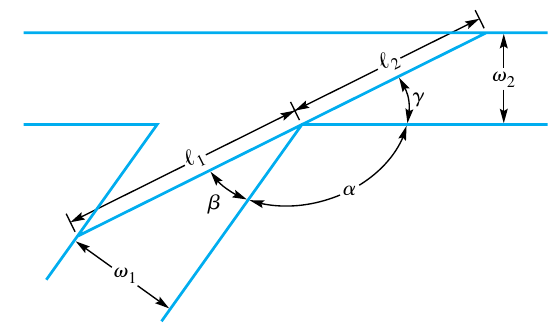

## Problema 9

Ache o retângulo de área máxima se os vertices são $(0,0)$, $(x,0)$ ,$(x, \cos x)$, $(0, \cos x)$. Assuma que $ 0 \leq x \leq \pi/2 $

## Problema 10

(Algoritmo de Moler-Morrison) O Algoritmo é uma aproximação de $\sqrt{x^2 + y^2}$ e é dado por :

**Função** $f(x,y)$

$f \longleftarrow max( \vert x \vert, \vert y \vert )$

$a \longleftarrow min( \vert x \vert, \vert y \vert )$

**for** n=1 **t0** 3 **d0**

$b \longleftarrow (a/f)^2$


$c \longleftarrow b/(4 +b)$

$a \longleftarrow ca$

**fim for**

**fim função**

Teste o algoritmo para casos simples com $(x,y) = (3,4), (-5,12) \;\;\; e \;\;\ (7,24).$ Escreva uma função que use $f(x,y)$ para a aproximação na **norma Euclidiana** do vetor $x=(x_1,x_2, \cdots, x_n)$.

# Sistemas Lineares

## Problema 1

Considere o sistema
$$\begin{cases}
10^{-4}x_1 &+ x_2 &= b_1 \\
x_1 &+x_2 & = b_2
\end{cases} $$


nde $b_1 \neq 0$ e $b_2 \neq 0$. Sua solução exata é $x_1 =\dfrac{- b 1 + b 2}{1 - 10^ {−4}}$, $x_2 =\dfrac{b 1 - 10^{−4} b 2}{1 - 10^{ −4}}$


a. Seja $b_1 = 1$ e $b_2 = 2$. Resolva este sistema usando a eliminação Gaussiana com aritmética de três dígitos (arredondada) e compare com a solução exata $x_1 =1,00010 ...$ e $x_2 = 0,99989 9 ....$

b. Repita a parte anterior após trocar a ordem das duas equações.a

c. Encontre os valores de $b_1$ e $b_2$ no sistema original de modo que a eliminação gaussiana ingênuanão dá respostas ruins

## Problema 2

Defina uma matriz $\mathbf{A} (n × n) $ pela equação $a_{i j} = i + j$ . Defina $\mathbf{b}$ pela equação $b_i = i + 1$. Resolva $Ax = b$ usando os métodos diretos. O que x deve ser?

## Problema 3

Definir uma  matriz $n\times n$ para cada elemento sendo  $a_{i j} = -1 + 2 min( i , j )$. Em seguida, obter os elementos do vetor $( b_i )$  em tal forma que a solução do sistema $Ax=b$ seja um vetor $x$, onde todos os elementos de $x_i = 1 $. Resolva o sistema usado método de eliminação de Gauss pana $n=30$.

##Problema 4

Escreva uma função em Python para resolver uma sistema, $Cz =w$, onde os elementos são números complexos utilizando o método de eleiminação de Gauss. Partindo do princípio que $c_{ij} = a_{ij} + b_{ij}i$, pode-se escrever $C = A + Bi$. de maneira análoga, $ z= x + yi$ e $ w= u + vi$, então pode-se construir um sistema em blocos:
$$
\begin{bmatrix}
A & -B \\
B & A
\end{bmatrix}\begin{Bmatrix}
x \\ y \end{Bmatrix} = \begin{Bmatrix} u \\ v \end{Bmatrix}
$$
Resolva os seguintes sistemas:
$$C = \begin{bmatrix}
5+9i &5+5i &-6 -6i& -7-7i \\
3+3i & 6+10i& -5-5i& -6 -6i \\
2 + 2i & 3+3i& -1 +3i &-5 -5i \\
1 +i &2+2i & -3-3i& 4i
\end{bmatrix}
$$

Para os seguintes $w$

$$
\begin{bmatrix}
-10 +2i\\
-5 +i\\
-5 +i\\
-5 +i
 \end{bmatrix}, \;\;\;\;
 \begin{bmatrix}
2+6i\\
4+12i\\
2+6i\\
2+6i
 \end{bmatrix}, \;\;\;\;
 \begin{bmatrix}
7-3i\\
7-3i\\
0\\
7-3i
 \end{bmatrix}, \;\;\;\;
 \begin{bmatrix}
-4-8i\\
-4-8i\\
-4-8i\\
0
 \end{bmatrix}$$

## Problema 5

Considere o sistema:
$$\begin{bmatrix}
0.4096 &0.1234 & 0.3678 &0.2943 \\
0.2246 &0.3872 & 0.4015 & 0.1129 \\
0.3645 &0.1920 & 0.3781 & 0.0643 \\
0.1784 &0.4002 & 0.2786 & 0.3927
\end{bmatrix}\begin{bmatrix} x_1\\x_2\\x_3 \\ x_4 \end{bmatrix}=
\begin{bmatrix} 0.4043\\0.1550\\0.4240 \\ 0.2557 \end{bmatrix}$$

a.Resolva os istema utilizando Eliminação de Gauss e Eliminação com pivotamento.

b. Assumindo que houve um erro de digitação em uns dos elementos da matriz, ao invéis de digitar 0.3645, foi digitado 0.3345. Ao resolver o sistema com esse pequeno erro, foi possíve observar alguma alteração? Por que?

## Problema 6

Seja a matriz de Hilbert de ordem n , definida por $a_{ij} = (i+j -1)^{-1}$ e vamos definir como sendo os elemntos do vetor $b$ por, $b_i = \sum_{j=1}^{n} a_{ij}$. Obtenaha as soluções de $Ax=b$, para $1<n<16$.

## Problema 7

Definir uma  matriz $n\times n$ para cada elemento sendo  $a_{i j} = -1 + 2 max( i , j )$. Em seguida, obter os elementos do vetor $( b_i )$  em tal forma que a solução do sistema $Ax=b$ seja um vetor $x$, onde todos os elementos de $x_i = 1 $. Resolva o sistema usado método de eliminação de Gauss pana $n=30$.

## Problema 8

Resolva o sistema $Ax=b$ para $4<n<21$, onde $a_{ij} =(i-j)^{j-1}$ e $b_i = i-1$. Qual o valor exato? Calcule o erro absoluto e relativo da solução numerica para a solução exata.

## Problema 9

Resolva o sistema $Ax=b$ para $1<n<5$, onde
$$a_{ij} =(i+j)^{2}\;\;\; e \;\;\;  b_i = ni(i+n+1) + \frac{1}{6}n(1+n(2n+3))$$.
Qual o valor exato? Calcule o erro absoluto e relativo da solução numerica para a solução exata.

## Problema 10

Resolva o sistema $Ax=b$ para $1<n<10$, onde
$$a_{ij} =(i+j-1)^{7}\;\;\; e \;\;\;  b_i = p(n+i-1) -p(i-1)$$.

onde
$$p(x)=\frac{x^2}{24}(2 +x^2(-7 +n^2(14 + n(12+3n))))  $$


Explique o que acontece.

## Problema 11

O determinante de uma matriz quadrada pode ser facilmente calculado com a ajuda da decomposição LU.. Escreva uma função det(A) que calcula o determinante de uma matriz n × n.  Verifique numericamente a função det usando as seguintes matrizes de teste com vários
valores de n:

a. $$a_{ij} = \vert i-j \vert \;\;\;\;\;\;\det(A) = (-1)^{n-1}(n-1)2^{n-2}$$

b.
$$
a_{ij}=\begin{cases}
1 & j\geqslant i \\
-j & j<i
\end{cases} \;\;\;\;\;\;\;\; det(A)=n!
$$


c.
$$
a_{ij} =\begin{cases}
a_{j1} = n^{-1}& j\geqslant 1 \\
a_{i-1,j} + a_{i,j-1} &i, j \geqslant 2
\end{cases} \;\;\;\;\;\;\;\; det(A)=n^{-n}
$$

d. Overflow e underflow poderá occorrer na execurção dessa função det(A). Uma maneira de evitar isso é fazer $\log \vert det(A) \vert$ desta maneira obtendo a soma dos termos $\log \vert d_{ii} \vert$ e usando a função exponencial no final. Realize esse procedimento e repita os itens a,b e c.

##Problema 12

Compare a solução dos dois sistema a seguir:

$$  
\begin{bmatrix}
1&\frac{1}{2}&\frac{1}{3}&\frac{1}{4}&\frac{1}{5}\\
\frac{1}{2}&\frac{1}{3}&\frac{1}{4}&\frac{1}{5}&\frac{1}{6}\\
\frac{1}{3}&\frac{1}{4}&\frac{1}{5}&\frac{1}{6}&\frac{1}{7}\\
\frac{1}{4}&\frac{1}{5}&\frac{1}{6}&\frac{1}{7}&\frac{1}{8}\\
\frac{1}{5}&\frac{1}{6}&\frac{1}{7}&\frac{1}{8}&\frac{1}{9}\\
\end{bmatrix}\begin{Bmatrix}
x_1 \\ x_2 \\ x_3 \\ x_4 \\ x_5
\end{Bmatrix} = \begin{Bmatrix}
1\\ 0 \\ 0 \\ 0 \\ 0
\end{Bmatrix}
$$

$$  
\begin{bmatrix}
1&0.5&0.333333&0.25&0.2\\
0.5&0.333333&0.25&0.2&0.166667\\
0.333333&0.25&0.2&0.166667&0.142857\\
0.25&0.2&0.166667&0.142857&0.125\\
0.2&0.166667&0.142857&0.125&0.111111\\
\end{bmatrix}\begin{Bmatrix}
x_1 \\ x_2 \\ x_3 \\ x_4 \\ x_5
\end{Bmatrix} = \begin{Bmatrix}
1\\ 0 \\ 0 \\ 0 \\ 0
\end{Bmatrix}
$$

a, Para ambos sistemas calcule o norma do verto resíduos, $\Vert r \Vert_{2} = \Vert A\hat{x} -b \Vert_{2}$ e  a norma do verto erro absoluto, $\Vert e \Vert_{2} = \Vert \hat{x} - x \Vert_{2} $, onde $\hat{x}$ é a solução numérica e $x=[25,-300,1050,-1400,630]$ a solução exata para o primeiro sistema.

b. Repita o item a, mas reescreva o sistema $a_{ij} \Longleftarrow 7560 a_{ij}  $ e $b_{i} \Longleftarrow 7560 b_{i}  $

## Problema 13

Resolva o sistema tridiagonal:
$$\begin{cases}
x_1 +0.5x_2 &=1.5 \\
0.5x_{i-1}+x_i +0.5x_{i+1} &=2.0& (2 \leq i \leq 99) \\
0.5x_{99} + x_{100} &= 1.5
\end{cases}
$$

## Problema 14

Considere o sistema de equações (n=5)


$$
\begin{bmatrix}
d_1& & & &  a_5 \\
 &d_2& &a_4& \\
 & & d_3 & & \\
  &a_2& &d_4& \\
  a_1& & & &  d_5
\end{bmatrix}\begin{bmatrix}
x_1\\x_2 \\x_3\\x_4 \\ x_5 \end{bmatrix}=\begin{bmatrix}
b_1\\b_2 \\b_3\\b_4 \\ b_5 \end{bmatrix}
$$


Escreva uma função para resolver esse tipo de sistema e apresente um exemplo para $n=2k+1$

## Problema 15

Seja o sistema para $n=7$.

$$
\begin{bmatrix}
d_1 & & & & & &  \\
a_1 & d_2& & & & &  \\
 &a_2 &d_3 & & & &  \\
  & &a_3 &d_4 &a_4 & &  \\
  & & & &d_5  &a_5 & \\
 & & & & &d_6 &a_6 \\
   & & & & & &d_7\\
\end{bmatrix}\begin{bmatrix}
x_1\\x_2 \\x_3\\x_4 \\ x_5 \\x_6 \\x_7\end{bmatrix}=\begin{bmatrix}
b_1\\b_2 \\b_3\\b_4 \\ b_5 \\b_6 \\b_7 \end{bmatrix}
$$

Escreva uma função para resolver esse tipo de sistema e apresente um exemplo para $n=2k+1$.

## Problema 16

Seja o sistema para $n=7$.

$$
\begin{bmatrix}
 & & & & &c_1 & d_1 \\
 & & & & c_2&d_2 & e_1 \\
 & &&c_3 &d_3 &e_2 &  \\
  & &\ldots &\ldots &\ldots & &  \\
  & & & \ldots&\ldots  & & \\
 c_{n-1}&d_{n-1} &e_{n-2} & & & & \\
   d_n&e_{n-1} & & & & &\\
\end{bmatrix}\begin{bmatrix}
x_1\\x_2 \\x_3\\ \vdots \\ \vdots \\x_{n-1} \\x_n\end{bmatrix}=\begin{bmatrix}
b_1\\b_2 \\b_3\\\vdots \\ \vdots \\b_{n-1} \\b_n \end{bmatrix}
$$

Escreva uma função para resolver esse tipo de sistema e apresente um exemplo para $n$.

## Problema 17

A equação filtro para um filtro spline não-períodica é dado por um sistema $n \times n$

$$(I +\alpha^{4}Q)w = z$$

onde a matriz é:

$$
Q =\begin{bmatrix}
1 & -2 & 1 & 0 & 0& \cdots & 0& 0&0&0 \\
-2 & 5 & -4 & 1 & 0 &\cdots & 0& 0&0&0 \\
1 & -4 & 6 & -4 &1&\cdots & 0& 0&0&0 \\
0 & 1 & -4 & 6 &  -4&\cdots & 0& 0&0&0 \\
\vdots & \vdots & \vdots & \vdots & \ddots & \vdots& \vdots & \vdots & \vdots&\vdots\\
0 & 0 & 0 & 0  &\cdots&1& -4&6& -4& -1\\
0 & 0 & 0 & 0 &\cdots &0&1 & -4&5& -2\\
0 & 0 & 0 & 0 &\cdots &0&0 & a_{n-1}&c_{n-1}& d_{n-1}
\end{bmatrix}
$$

O parâmetro $-0.5 \leq \alpha \leq 0.5 $. Use o algoritmo para resolver diversos sistemas pentadiagonais usando diversos $\alpha$ e obtenha os valores de $z$ usando $w=[1,-1,1,-1, \cdots,1]^T$ com o valor de $n=50$.

## Problema 18

a. Escreva e teste uma função para resolver o sistema $AX = B$ no qual $A$, $X$ e $B$ são matrizes de ordem $n × n$, $n × m$ e $n × m$, respectivamente. Verifique se a função funciona em vários casos de teste, um dos quais tem $B = I$ de forma que a solução $X$ seja a inversa de A.

b. Teste a função para calcular a inversa de A de ordem 10:

$$ A=\begin{bmatrix}
-2 & 1 & 0 & 0 & \cdots & 0 \\
1 & -2 & 1 & 0 & \cdots & 0 \\
0 & 1 & -2 & 1 & \cdots & 0 \\
0 & 0 & 1 & 2 & \cdots & 0 \\
\vdots & \vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & 0 & 1 & -2
\end{bmatrix}$$

c. Compare o resulta com o valor exato:$$(A^{-1})_{ij} =(A^{-1})_{ji}= \dfrac{-i(n+1 -j)}{n+1} \;\;\;\;\;\; (i \leq j)$$


## Problema 19

Usando os métodos iterativos Jacobi e Gauss-Seidel, resolva o o sistema


linear abaixo com 4 casa decimais (arredondamento) e compare o número de iterações que foram utilizados e compare com a solução exata, $x=[1,1,1,1]^T.$

$$
\begin{bmatrix}
7 &1 &-1 & 2 \\
1 &8 &0 & -2 \\
-1 &0 & 4 & -1 \\
2&-2 &-1 & 6
\end{bmatrix}\begin{bmatrix}
x_1 \\ x_2 \\ x_3 \\ x_4
\end{bmatrix}=\begin{bmatrix}
3 \\ -5 \\ 4 \\ -3
\end{bmatrix}
$$





## Problema 20

( Básico do Métod dos Gradientes Conjugados) Considere um exemplo simples de um sistema linear $Ax=b$, onde

$$
A= \begin{bmatrix}
3 & 2 \\
2 & 6
\end{bmatrix} \;\;\;\; b= \begin{bmatrix} 2 \\ -8 \end{bmatrix}, \;\;\;\; c=0
$$

1. Obtenha a solução gráfica
2. Construa o gráfico da função $F(x) =c +b^T x + \frac{1}{2}x^T A x $ e mostre que o minímo dessa superfície é a solução de $Ax=b$
3. Construa as curvas de nível da superfície $F(x)$

## Problema 21

Para combater um vírus que infectou um grupo de indivíduos vai ser administrado
um composto químico sintetizado com base em duas substâncias elementares $x_1$ e
$x_2$ . Sabe-se que se forem administrados α miligramas de composto a cada indivíduo,
a concentração (mg/litro) de cada uma das substâncias elementares na circulação
sanguínea é dada implicitamente (para $\alpha \in [0, 5]$) pelo sistema de equações:

$$\begin{cases}
16x_1 &-&\cos(\alpha(x_2 -2x_1)) &= 0\\
16x_2&+&0.75\sin(\alpha(-x_2 - 3x_1)) &=0\end{cases}$$

Para $\alpha = 1$, determine $x_1$ e $x_2$ usando o método iterativo mais adequado. Use a
seguinte aproximação inicial $x^{(0)} = [0.1, 0.01]^T$ e termine o processo iterativo consi
derando $tol  = 0.05$ (1 iteração).

## Problema 22

Uma fábrica de tintas pretende utilizar as sobras de tinta de 4 tipos diferentes de
tonalidades de tinta verde para criar uma tonalidade de verde mais popular. Uma
unidade de medida (u.m.) da nova tinta será composta por $x_1$ u.m. de tinta tipo 1,
$x_2$ u.m. de tinta tipo 2, $x_3$ u.m. de tinta tipo 3 e $x_4$ u.m. de tinta tipo 4. Cada
u.m. de tinta nova é composta por 4 pigmentos que estão relacionados pelo seguinte
sistema de equações lineares:

$$\begin{cases}
80x_1 &+& & &30x_3&+&10x_4&=40 \\
&  & 80x_2 &+&10x_3&+& 10x_4 &=27\\
16x_1&+&20x_2&+&60x_3&+&72x_4&=31\\
4x_1&+& & & &&8x_4&=2
\end{cases}$$

Os coeficientes da matriz representam a percentagem de pigmento em cada uma das
4 diferentes tonalidades de tinta verde, por exemplo, a tinta com a nova tonalidade
deverá conter 31% de pigmento 3, sabendo que a tinta tipo 1 contem 16%, a tinta
tipo 2 20%, a tinta tipo 3 60% e a tinta tipo 4 contem 72% do mesmo pigmento.

a) Analisando apenas as condições suficientes de convergência, verifique se o método
de Gauss-Seidel converge, quando aplicado a este sistema.


b) Resolva o sistema de equações usando o método iterativo de Gauss-Seidel, utilizando para aproximação inicial o ponto $[0.5, 0.2, 0.2, 0]^T$ e utilizando para critério de paragem $\epsilon = 0.25$ ou $k_{ max} = 2$.

## Problema 23

Um engenheiro de Produção supervisiona a produção de quatro tipos de computadores. Existem quatro espécies de recursos necessários à produção: mão-de-obra,
metais, plásticos e componentes electrónicos. As quantidades destes recursos, neces-
sárias para produzir cada computador são:

 Dados |Mão de obra (h/comp.) | Metais (Kg/comp.) | Plásticos (Kg/comp.) | Componentes (unid./comp.)
-------|----------------------|-------------------|----------------------|---------------------------
1|3|20|10|10
2|4|25|15|8
3|7|40|20|10
4| 20|50|22|15

Considere um consumo diário de 504 h de mão-de-obra, 1970 Kg de metais, 970 Kg de plásticos e
601 componentes.
a) Use um método directo e estável para calcular o número de computadores (número inteiro) de cada tipo produzidos por dia.

b) Use o método iterativo de Gauss-Seidel, tomando como aproximação inicial $x^{(0)} =[9, 10, 12, 10]^T$. Apresente apenas os cálculos relativos às duas primeiras iterações,
indicando uma estimativa do erro relativo.

c) Comente os resultados obtidos, analisando as condições suficientes de convergência.






## Problema 24

Considere o seguinte sistema de equações para determinar as concentrações $c_1$ , $c_2$ e $c_3$ $(g/m^3 )$ numa série de 3 reactores como função da quantidade de massa à entrada
de cada reactor (termo independente do sistema em g):

$$\begin{cases}
17c_1&-2c_2&-3c_3 &=500\\
-5c_1&+21c_2&-2c_3 &=200\\
-5c_1&-5c_2&+22c_3 &=30
\end{cases}
$$

a) Analise as condições suficientes de convergência do método de Gauss-Seidel quando aplicado ao sistema.

b) Aplique o método de Gauss-Seidel ao sistema, considerando como aproximação
inicial o ponto $[34, 19, 13]$ e $tol = 0.0025$ ou no máximo 2 iterações.

## Problema 25

Considere os vetores:

$$
\overrightarrow{A} = 2\overrightarrow{i} - 3\overrightarrow{j} +a\overrightarrow{k}$$

$$\overrightarrow{B} = b\overrightarrow{i} + \overrightarrow{j} -4\overrightarrow{k}$$

$$\overrightarrow{C} = 3\overrightarrow{i} + c\overrightarrow{j} +2\overrightarrow{k}
$$

O vetor $\overrightarrow{A} $ é perpendicular a $\overrightarrow{B} $ e a $\overrightarrow{C} $. Sabe-se também que $\overrightarrow{B} \cdot \overrightarrow{C}=2$. Determine $a,b,c$.

## Problema 26

Resolva o sistema não-linear abaixo com $tol= 10^{-4}$


 (Broyden Tridiagonal)
$$
\begin{cases}
f_1(x) &=(3-2x_1)x_1 -2x_2 +1 &=0 \\
f_i(x) &=(3-2x_i)x_i - x_{i-1} - 2x_{i+1} +1 &=0\\
f_{10}&=(3 - 2x_{10})x_{10} -x_9 +1 &=0
\end{cases}, \;\;\;\;\;\; i=2, \cdots,9
$$

## Problema 27

Resolva o sistema não-linear abaixo com $tol= 10^{-4}$


 (Broyden Trigexp de Toint)
$$
\begin{cases}
f_1(x) &=3x_1^3 + 2x_2 -5 +\sin(x_1 -x_2)\sin(x_1 +x_2) &=0 \\
f_i(x) &=-x_{1}e^{(x_{i-1}-x_i)} + x_i(4 +3x_i^2)+ 2x_{i+1} +\sin(x_i -x_{i+1})\sin(x_i -x_{i+1}) -8 &=0\\
f_{10}&=-x_9e^{(x_9 -x_{10})} + 4x_{10} - 3&=0
\end{cases}, \;\;\;\;\;\; i=2, \cdots,9
$$

## Problema 28

Sejam uma matriz $A$ de ordem $n$, um vetor arbitrário $y^0$ de tamanho n e os vetores $y^k = Ay^{k-1}$, $k=1,2,\cdots,n$. O método de Krilov consiste em calcularos coeficientes do polinômio característico $P(\lambda)= \lambda^n +d_{n-1}\lambda^{n-1} + \cdots + d_1 \lambda + d_0$ pela solução do sistema linear $Kd= -y^n$, sendo $K = [y^{n-1} \;\; y^{n-2} \;\;\cdots \;\; y^0]$. Se a matriz K for singular, deve-se trocar o vetor arbritário inicial $y^0$.

1. Fazer um program em Python do método de Krilov

2. Determine o polinômio caracterítico da matriz

$$ \begin{bmatrix}
7&14&-2\\
-3 &-10&2\\
-12 &-28 & 5
\end{bmatrix}
$$

## Problema 29

Suponha que um time de três pára-quedistas está ligado por uma corda sem peso enquanto cai, em queda livre, a uma velocidade de 5 m/s (Figura). Calcule a tensão em cada seção da corda e a aceleração do time, dado o seguinte:

Páraquedista | Massa,kg | Coeficiente de Arrasto, kg/s
-------------|----------|-----------------------------
     1       |    70    |         10
     2       |    60    |         14
     3       |    40     | 17


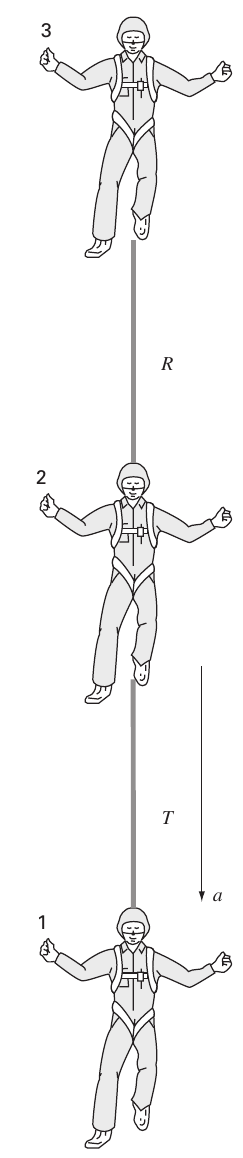

Sejam $m_1,m_2,m_3$ as massas dos paraquedistas e $c_1,c_2,c_3$ as constantes de arrasto associdadas. Então, de modo que todos os paraquedistas possuam a mesma aceleração:

$$\begin{align*}
m_1a&=m_1g-T_T-c_1v\\
m_2a&=m_2g+T_T-T_R-c_2v\\
m_3a&=m_3g-T_R-c_3v
\end{align*}
$$

Temos então o seguinte sistema linear:
$$
\begin{bmatrix}
1&0&m_1\\
-1 & 1 & m_2\\
0 & -1 & m_3\\
\end{bmatrix}
\begin{bmatrix}
T_T\\
T_R\\
a\\
\end{bmatrix}=
\begin{bmatrix}
m_1g-c_1v\\
m_2g-c_2v\\
m_3g-c_3v\\
\end{bmatrix}
$$

Substituindo os valores do enunciado, obtemos:
$$
\begin{bmatrix}
1&0&70\\
-1 & 1 & 60\\
0 & -1 & 40\\
\end{bmatrix}
\begin{bmatrix}
T_T\\
T_R\\
a\\
\end{bmatrix}=
\begin{bmatrix}
650\\
530\\
315\\
\end{bmatrix}
$$

## Problema 30

Três blocos são ligados por uma corda sem peso e repousam
em um plano inclinado (Figura 1). Determine a aceleração a e as tensões T e R nas duas cordas.




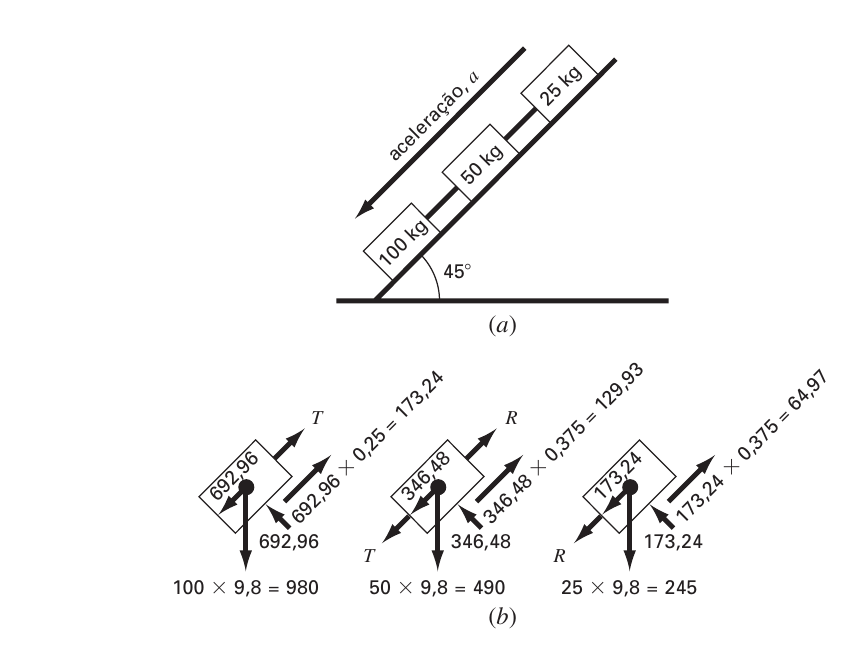